<a href="https://colab.research.google.com/github/ripRish/SENTIMENT-ANALYSIS-ON-DEPRESSION/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Building 

# New section

In [ ]:
#lokavah728@veb65.com
#NOPASSWORD
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nonhomosapien","key":"b68b309259554226e12f569ade805583"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Data Set Download

In [ ]:
! kaggle datasets download -d ywang311/twitter-sentiment -p /content/sample_data/ --unzip
! kaggle datasets download -d kazanova/sentiment140 -p /content/sample_data/ --unzip


 78% 44.0M/56.4M [00:00<00:00, 162MB/s]
100% 56.4M/56.4M [00:00<00:00, 164MB/s]
 70% 57.0M/80.9M [00:00<00:00, 156MB/s] 
100% 80.9M/80.9M [00:00<00:00, 169MB/s]


Data set Processing 

In [ ]:
import pandas as pd
import shutil
import os
import random
import numpy as np

dataset_1=pd.read_csv('/content/sample_data/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',usecols=[0,5])
dataset_1.columns = ['Sentiment','SentimentText']
dataset_2 = pd.read_csv('/content/sample_data/Sentiment Analysis Dataset 2.csv',encoding='ISO-8859-1',skiprows=[8835,535881],usecols=[1,3])
dataset = pd.concat([dataset_1,dataset_2], axis=0,ignore_index=True)
dataset
data=dataset.values.tolist()
dataset



,Sentiment,SentimentText
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
3178606,1,Zzzzzz.... Finally! Night tweeters!
3178607,1,"Zzzzzzz, sleep well people"
3178608,0,ZzzZzZzzzZ... wait no I have homework.
3178609,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


## **Data** **Cleaning**: 
textStemming :- removing URLS , Emojis, numbers 
Lemmatization :- Grammatically simple sentence 

In [ ]:
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


stopwordlist = [
                'a', 'about', 'above', 'after', 'ain', 'all', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'how', 'if', 'in',
             'into','is', 'it', 'its', 'just', 'll', 'm', 'ma',
             'more', 'most', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'out','re',
             's', 'same',  "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'was',
             'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y'
             ]

def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer
    wordLemm = WordNetLemmatizer()
    
    # Regex patterns
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for d in textdata:
        d = d.lower()
        
        # Replace all URls with 'URL'
        d = re.sub(urlPattern,' URL',d)
        # Replace all emojis.
        for emoji in emojis.keys():
            d = d.replace(emoji, " " + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        d = re.sub(userPattern,'', d)        
        # Replace all non alphabets.
        d = re.sub(alphaPattern, " ", d)
        # Replace 3 or more consecutive letters by 2 letter.
        d = re.sub(sequencePattern, seqReplacePattern, d)
        dwords = ''
        for word in d.split():
            # Checking if the word is a stopword.
            # If word not in stopwordlist
            if len(word)>1:
                
                word = wordLemm.lemmatize(word)
            
                dwords += (word+' ')
        processedText.append(dwords)
        
    return processedText

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Dividing Data into :- 1.training set 
                      2.Testing set 
        By 80:20

In [ ]:
spliter=.8
data=dataset.values.tolist()

random.shuffle(data)
Training = data[:int(len(data)*spliter)]
Testing = data[int(len(data)*spliter):]
training_posts = []
training_labels = []
testing_posts = []
testing_labels = []
for l,s in Training:
  training_posts.append(s)
  if l > 0:
    training_labels.append(1)
  else:
    training_labels.append(0)
for l,s in Testing:
  testing_posts.append(s)
  if l > 0:
    testing_labels.append(1)
  else:
    testing_labels.append(0)
training_posts=preprocess(training_posts)
testing_posts=preprocess(testing_posts)

Word cloud of Dataset 
Depressed and non Depressed

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
def cloud(posts):
  unique_string=" ".join(posts)
  wordcloud = WordCloud(width = 1000, height = 500,stopwords=['URL','EMOJI','USER','quot','amp','http','tinyurl','http bit','lol','twitpic.com','bit.ly','bit','ly']+stopwordlist).generate(unique_string)
  plt.figure(figsize=(20,12))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.savefig("your_file_name"+".png", bbox_inches='tight')
  plt.show()
  plt.close()


In [ ]:
depressed = []
ndepressed = []
for i in data:
  if i[0]==0:
    depressed.append(i[1])
  else :
    ndepressed.append(i[1])
print(depressed[100])
#cloud(depressed)
#cloud(ndepressed)

wants to be out in the sunshine but it's boring on my own. 


Bar Graph of Distribution of Depressed and Non Depressed post 


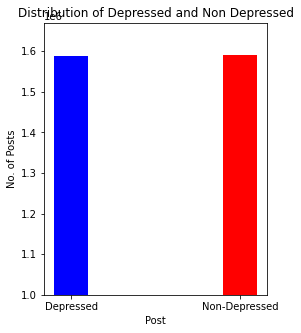

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(['Depressed','Non-Depressed'], [len(depressed),len(ndepressed)], color =['blue','red'],
        width = 0.2)
ax=plt.gca()
ax.set(ylim=[1000000,None])
plt.xlabel("Post")
plt.ylabel("No. of Posts")
plt.title("Distribution of Depressed and Non Depressed\n (million)")
plt.show()

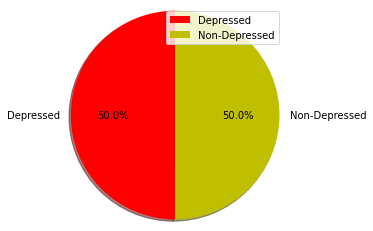

In [ ]:
import matplotlib.pyplot as plt
 
# defining labels
activities = ['Depressed', 'Non-Depressed']
 
# portion covered by each label
slices = [len(depressed),len(ndepressed)]
 
# color for each label
colors = ['r', 'y']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
max_length = 32
trunc_type='post'
oov_tok = "<OOV>"
padding_type='post'

tokens = Tokenizer(num_words = 10000 , oov_token=oov_tok,lower=True)


tokens.fit_on_texts(training_posts)
word_index = tokens.word_index
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokens, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(tokens.get_config())

vocab_size=len(word_index)
training_sequences = tokens.texts_to_sequences(training_posts)
training_padded = pad_sequences(training_sequences,maxlen=max_length, truncating=trunc_type, padding=padding_type)
print(training_padded.shape)
testing_sequences = tokens.texts_to_sequences(testing_posts)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type, padding=padding_type)

training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(2542888, 32)


In [ ]:
# !gdown --id 1W5vZy2etitAblLdFn8_DxnsQKzfFJ98g
# embeddings_index = {};
# with open('/content/emb/glove.6B.100d.txt') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs

##########word2vc
! kaggle datasets download -d danielwillgeorge/glove6b100dtxt -p /content/emb --unzip
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/content/emb/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions




In [ ]:
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding,Conv1D,MaxPooling1D , Bidirectional

model = Sequential([       
              Embedding(input_dim=vocab_size+1,
                        input_length = max_length,
                        output_dim=embedding_dim,
                        weights=[embeddings_matrix],
                        trainable=False,
                        ),
              
              Conv1D(64, 5, activation='relu'),
              MaxPooling1D(pool_size=4),
              Bidirectional(LSTM(64)),
              Dropout(0.2),
              #LSTM(32),
              Dense(32, activation='relu'),
              Dense(1, activation='sigmoid'),

              ])
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
keras.utils.plot_model(model, show_shapes=True)


Model Traning 

In [ ]:
import tensorflow as tf
import math 
from keras.callbacks import ReduceLROnPlateau

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, mode = "min")
# def lr_exp_decay(epoch, lr):
#     k = 0.1
#     return lr * math.exp(-k*epoch)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=1, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.000001)


history = model.fit(training_padded,
                    training_labels,
                    epochs=20,
                    steps_per_epoch=1000 ,
                    #batch_size = 16,
                    callbacks=[lr_reduction,callback],
                    validation_data = (testing_padded,testing_labels), verbose = 1)

model.save("Latest.h5")


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
from tensorflow import keras
model_saved = keras.models.load_model('/content/Latest.h5')
tweet_negative = "wants to be out in the sunshine but it's boring on my own." 
tweet_postive = "Its a beautiful daaaaaaayyyyy!!!!!!!! This makes me happy"
#Changing words into Token and addeding Padding for tweet_negative
negative_post = tokens.texts_to_sequences([tweet_negative])
negative_post = pad_sequences(negative_post,maxlen=max_length, truncating=trunc_type, padding=padding_type)

#Changing words into Token and addeding Padding for tweet_postive
postive_post = tokens.texts_to_sequences([tweet_postive])
postive_post = pad_sequences(postive_post,maxlen=max_length, truncating=trunc_type, padding=padding_type)

[[1, 2, 20, 32, 9, 3, 709, 17, 6250, 60, 107]]


In [ ]:
#Giving input to the model to get result (tweet_negative)
result  = model_saved.predict(negative_post)
print(tweet_negative)
if result >0.5 :
  print("Non Depressed Person")
else:
  print("Depressed Person\n")

#Giving input to the model to get result (tweet_postive)
print(tweet_postive)
result = model_saved.predict(postive_post)
if result >0.5 :
  print("Non Depressed Person")
else:
  print("Depressed Person")


wants to be out in the sunshine but I am sad.
Depressed Person

Its a beautiful daaaaaaayyyyy!!!!!!!! This makes me happy
Non Depressed Person


'''
batch_size = 32
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=1337,
)
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1337,
)
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
))
'''